<a href="https://colab.research.google.com/github/DarielAngel/Inteligencia-Artificial/blob/main/Bosque_de_Decisi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bosque de decisión
Aleatoriedad. Muestreo con reemplazo

---
>>> max_samples <<<




In [ ]:
import csv
import random

# Función para generar datos aleatorios
def generar_datos(n):
    estudios = ["Primario", "Secundario", "Universitario"]
    generos = ["Masculino", "Femenino"]
    tipos_trabajo = ["Oficina", "Fabrica", "Gerente", "Comercio"]

    data = []
    for _ in range(n):
        edad = random.randint(18, 65)
        estudio = random.choice(estudios)
        genero = random.choice(generos)
        tipo_trabajo = random.choice(tipos_trabajo)
        horas = random.randint(20, 60)
        ingreso = random.randint(15000, 120000)
        data.append({"edad": edad, "estudio": estudio, "genero": genero, "tipo_trabajo": tipo_trabajo, "horas": horas, "ingreso": ingreso})

    return data

# Generar 1000 tuplas de datos
data = generar_datos(1000)

# Definir el umbral para considerar un ingreso alto
umbral_ingreso_alto = 50000

# Crear y escribir en el archivo CSV
with open('personas.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    # Escribir la cabecera
    writer.writerow(["edad", "estudio", "genero", "tipo_trabajo", "horas", "ingreso", "ingreso_alto"])

    # Escribir los datos
    for persona in data:
        ingreso_alto = 1 if persona["ingreso"] >= umbral_ingreso_alto else 0
        writer.writerow([persona["edad"], persona["estudio"], persona["genero"], persona["tipo_trabajo"], persona["horas"], persona["ingreso"], ingreso_alto])

print("El archivo personas.csv con 1000 tuplas ha sido creado con éxito.")


El archivo personas.csv con 1000 tuplas ha sido creado con éxito.


In [4]:
import pandas as pd

personas = pd.read_csv('ingresos.csv')

print(personas.sample(frac=2/3, replace=True))
print(personas.sample(frac=2/3, replace=True))
print(personas.sample(frac=2/3, replace=True))
print(personas.sample(frac=2/3, replace=True))
print(personas.sample(frac=2/3, replace=True))

    edad  estudio  genero  tipo_trabajo  horas  ingreso
84    66        7       1             0     40        0
47    35       10       1             0     60        0
1     30        9       0             0     40        0
19    31       13       1             0     40        1
72    63       14       1             1     40        1
..   ...      ...     ...           ...    ...      ...
87    32       13       1             0     45        0
1     30        9       0             0     40        0
73    50       14       1             1     45        0
40    59       13       1             0     40        1
54    53        1       1             0     40        0

[67 rows x 6 columns]
    edad  estudio  genero  tipo_trabajo  horas  ingreso
49    71        9       1             0     45        1
45    54       13       1             1     40        1
73    50       14       1             1     45        0
66    21        9       0             0     40        0
42    24        9       1

# **Selección de características para divisiones**

In [9]:
from random import sample

print(personas.columns[:-1], "\n")
print(sample(set(personas.columns[:-1]), 3))

Index(['edad', 'estudio', 'genero', 'tipo_trabajo', 'horas'], dtype='object') 

['tipo_trabajo', 'genero', 'horas']


<ipython-input-9-e2667b356d74>:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  print(sample(set(personas.columns[:-1]), 3))


# **Creación de Bosque Aleatorio (Random Forest)**

In [12]:
from sklearn.ensemble import RandomForestClassifier

bosque = RandomForestClassifier(n_estimators=100,
                                criterion="gini",
                                max_features="sqrt",
                                bootstrap=True,
                                max_samples=2/3,
                                oob_score=True)

bosque.fit(personas[personas.columns[:-1]].values, personas["ingreso"].values)

print(bosque.predict([[50, 16, 1, 1, 40]]))
print(bosque.score(personas[personas.columns[:-1]].values, personas["ingreso"].values))
print(bosque.oob_score_)

[1]
0.98
0.78


# **Visualización del Bosque Aleatorio**


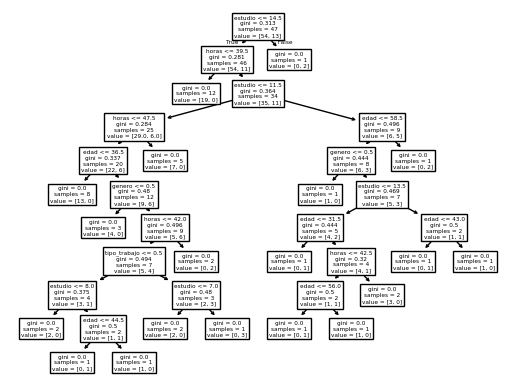

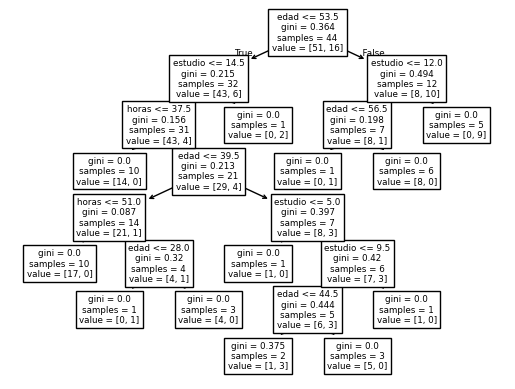

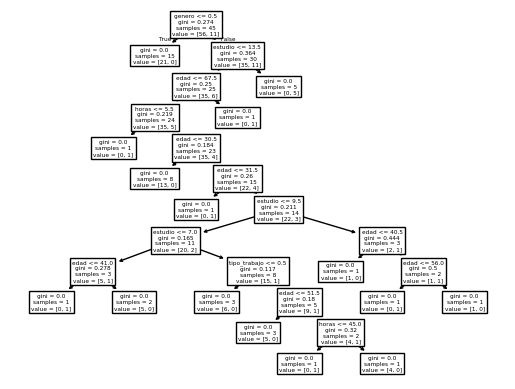

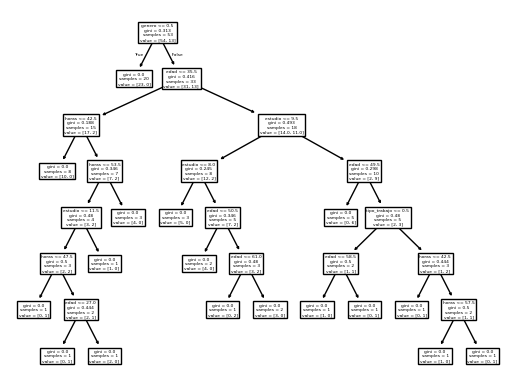

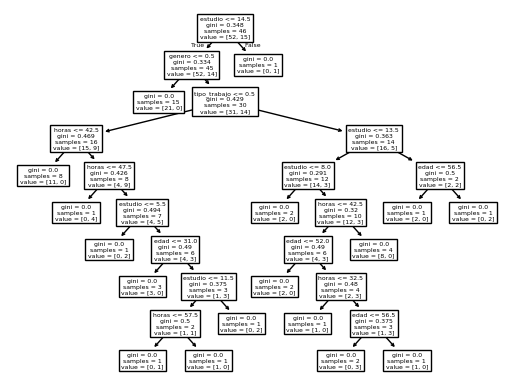

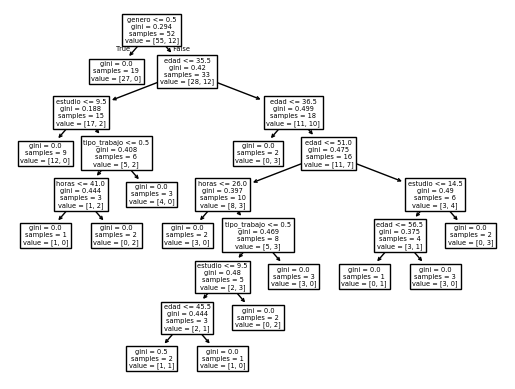

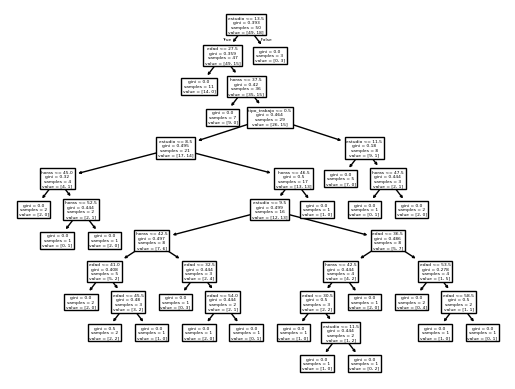

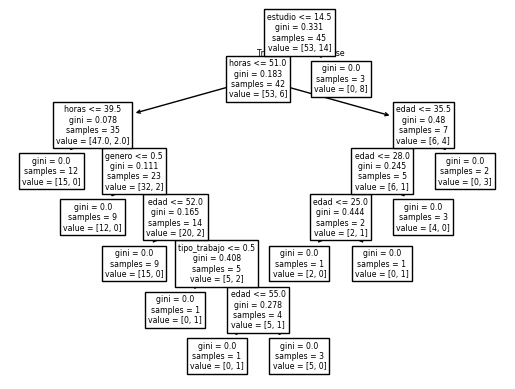

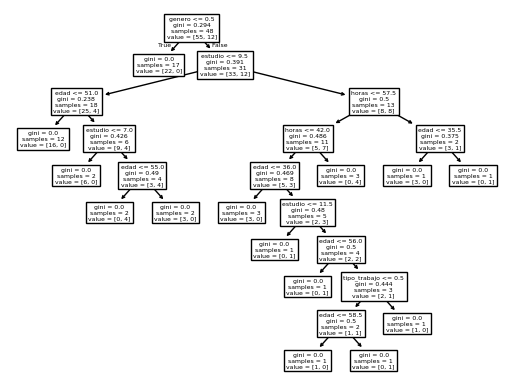

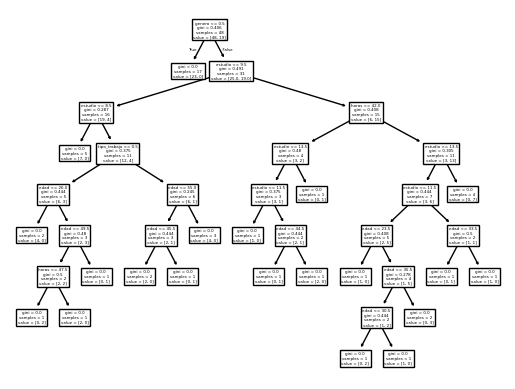

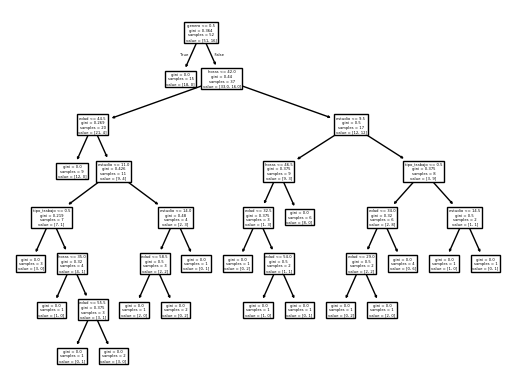

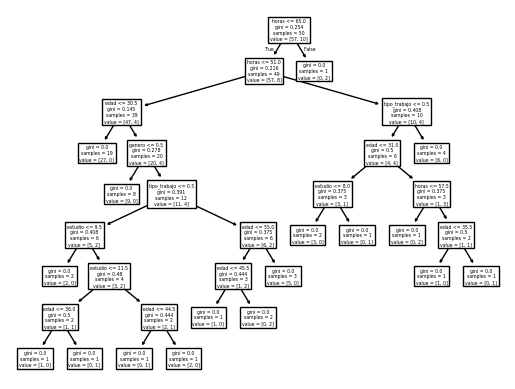

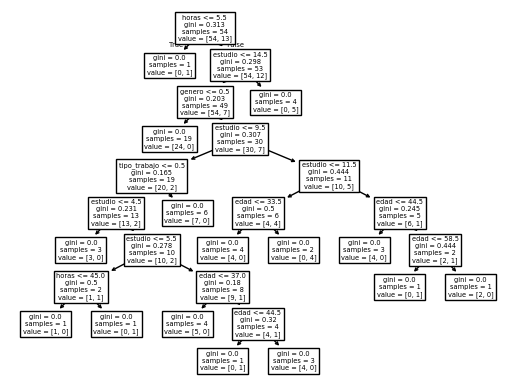

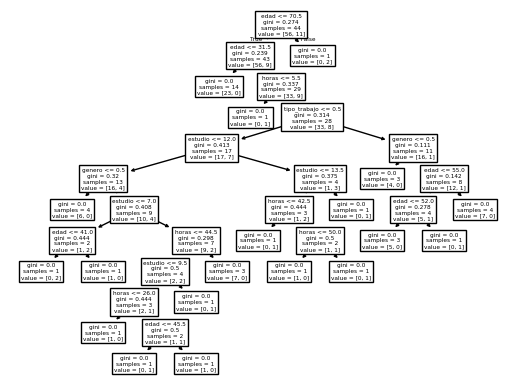

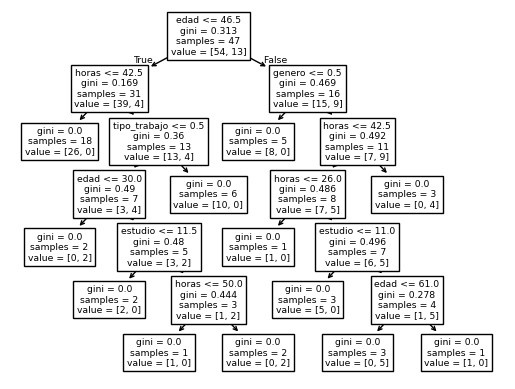

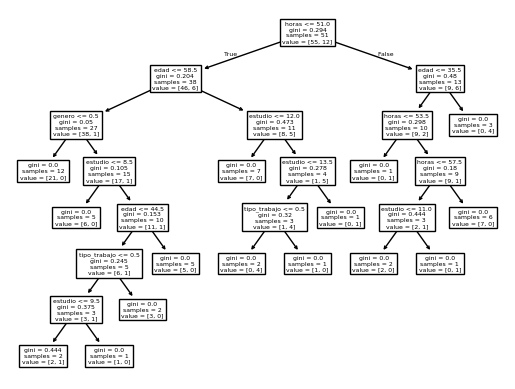

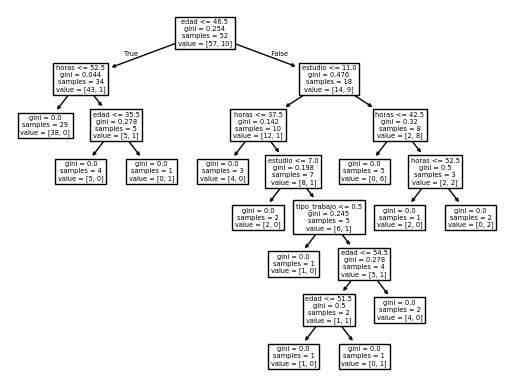

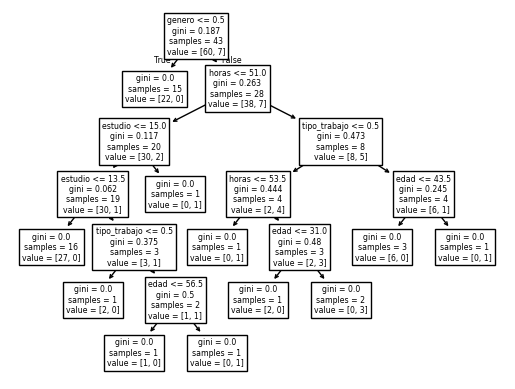

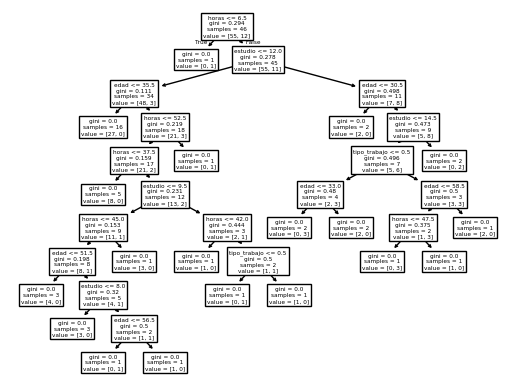

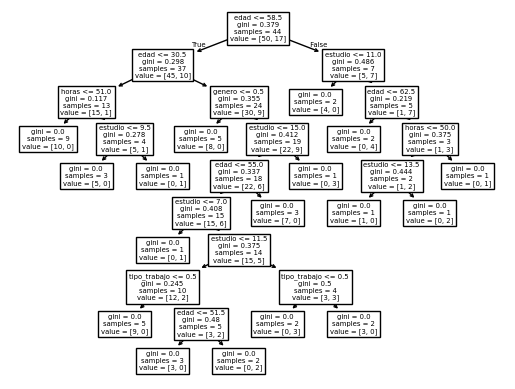

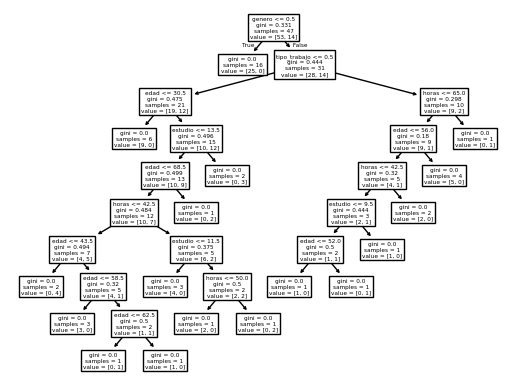

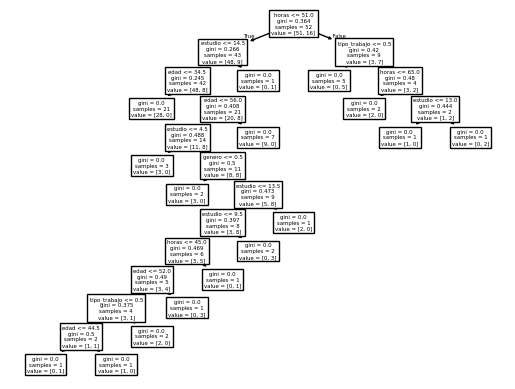

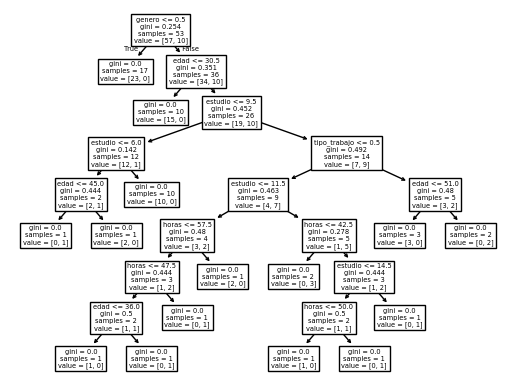

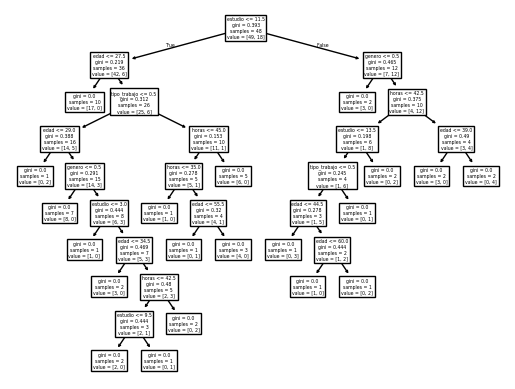

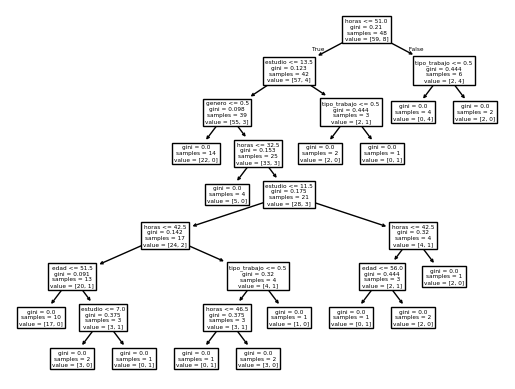

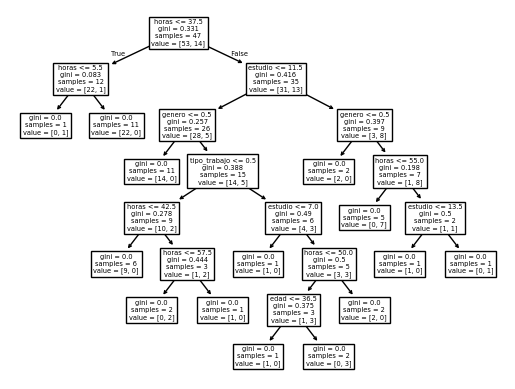

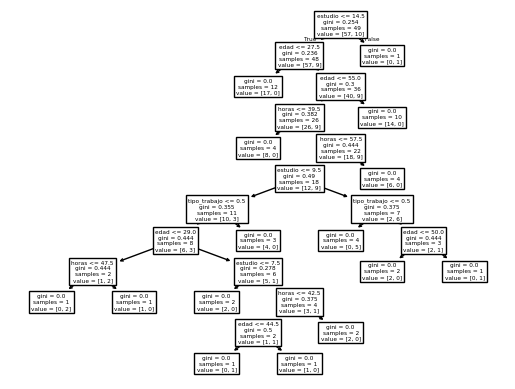

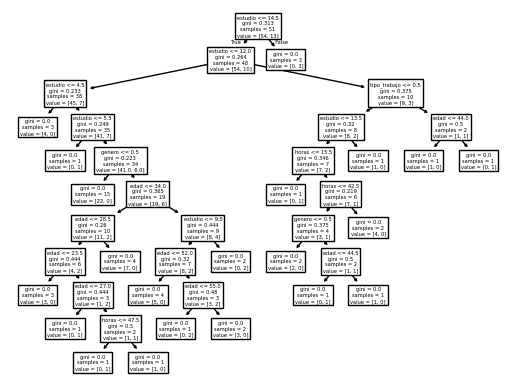

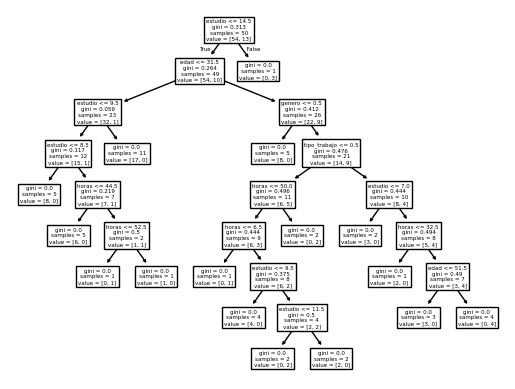

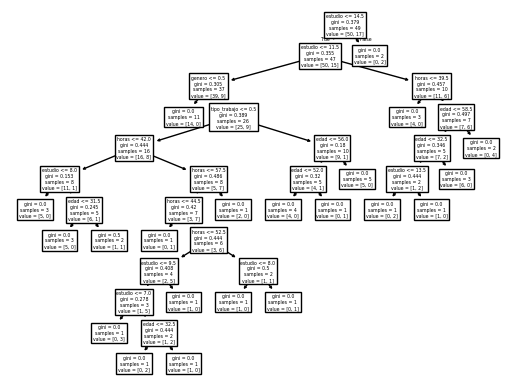

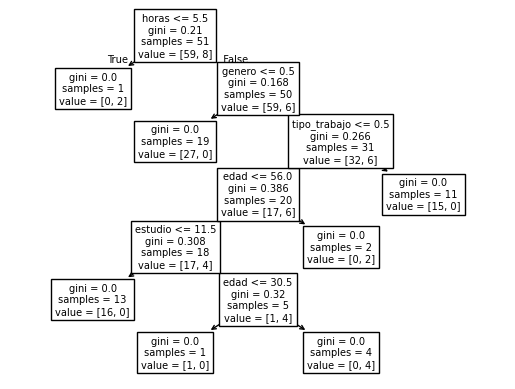

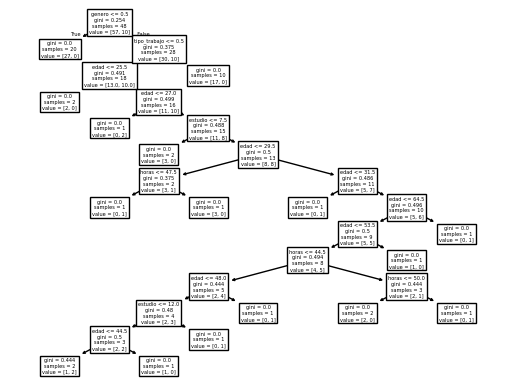

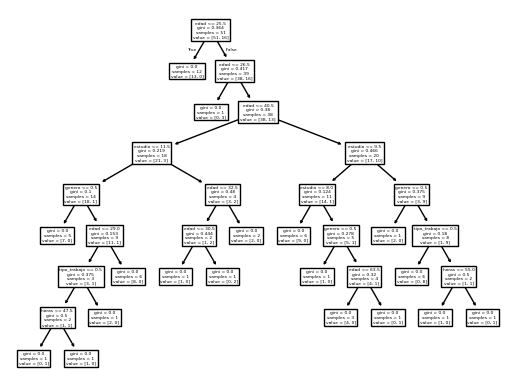

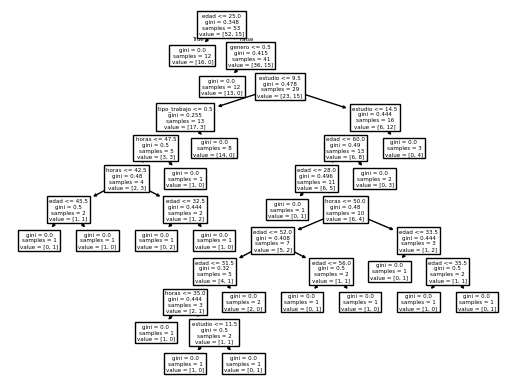

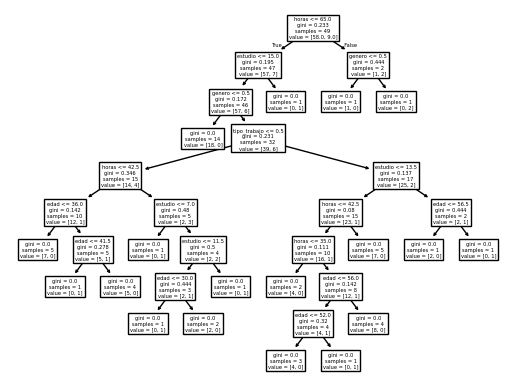

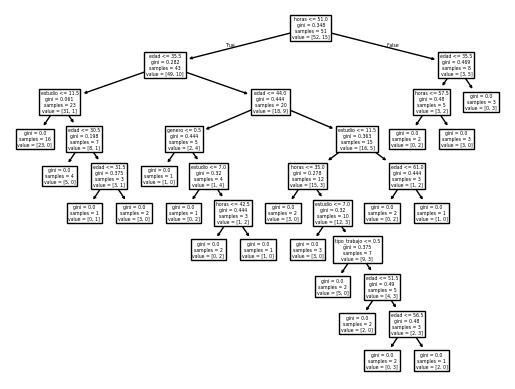

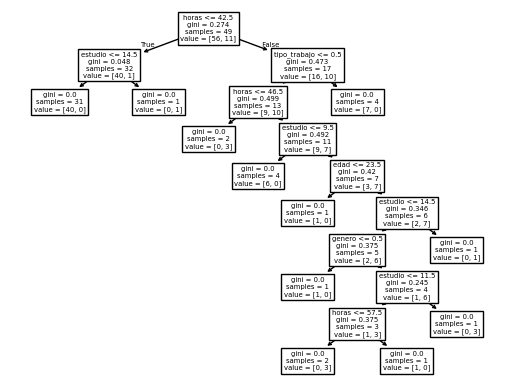

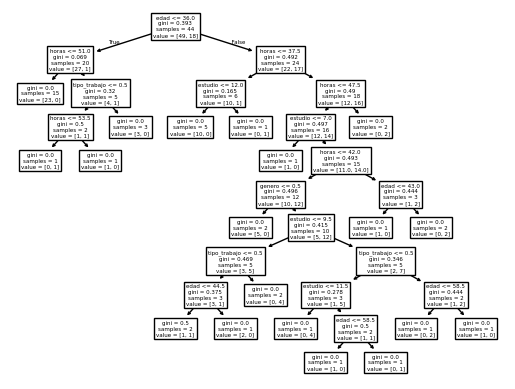

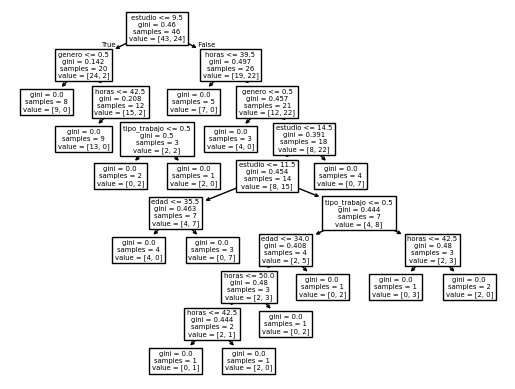

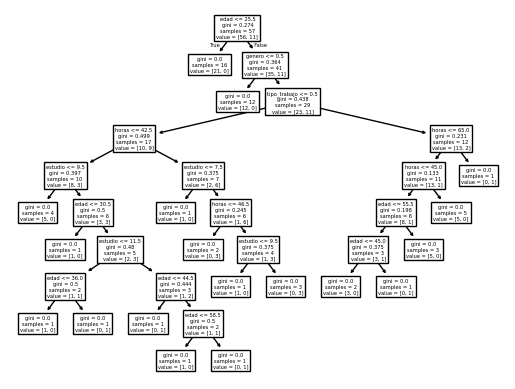

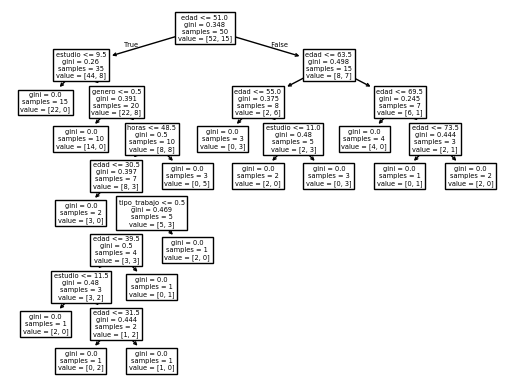

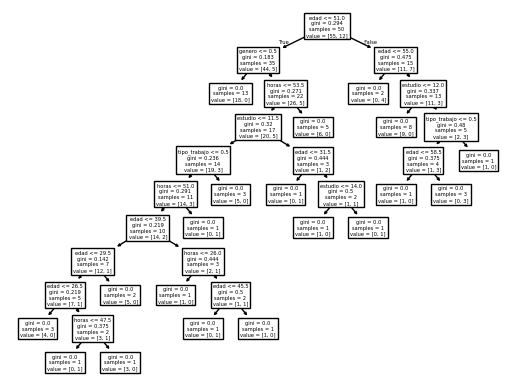

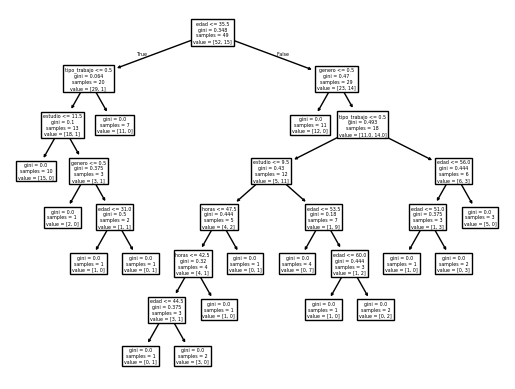

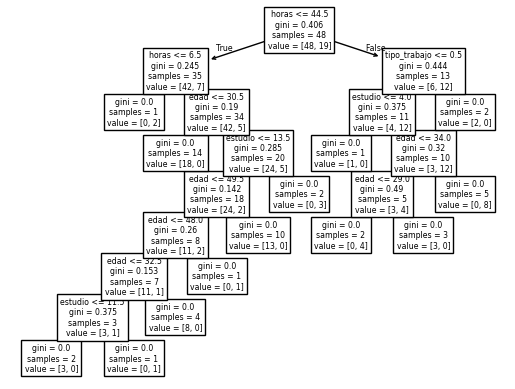

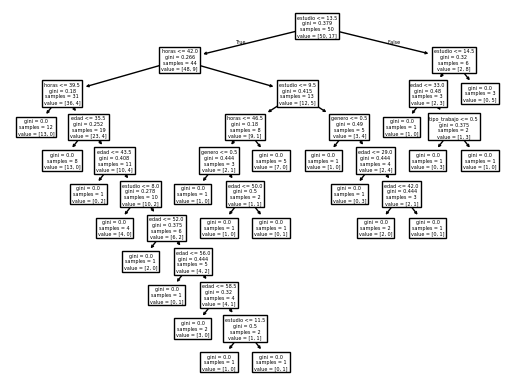

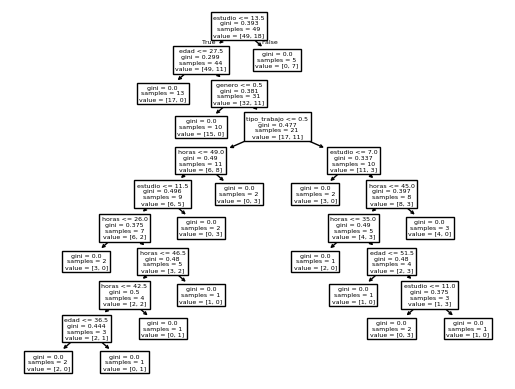

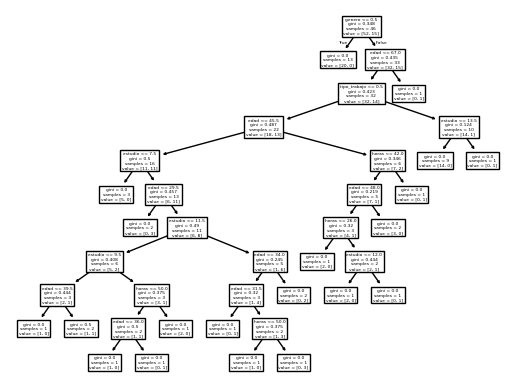

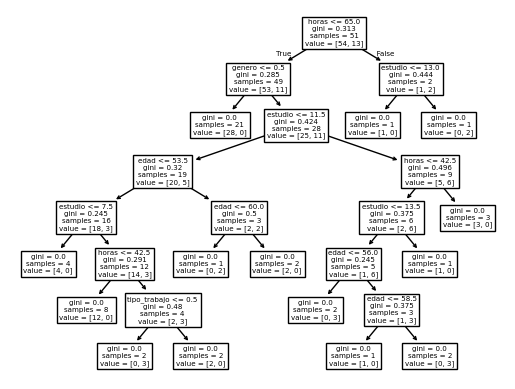

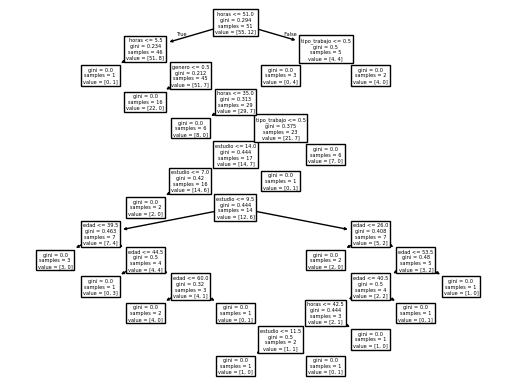

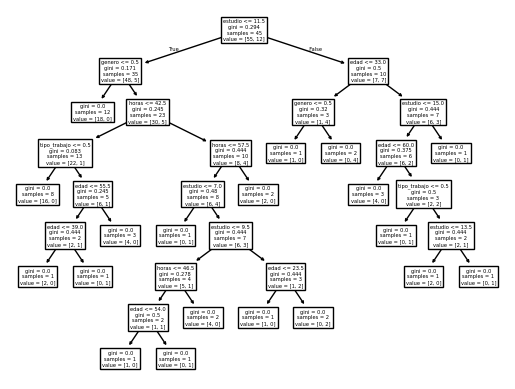

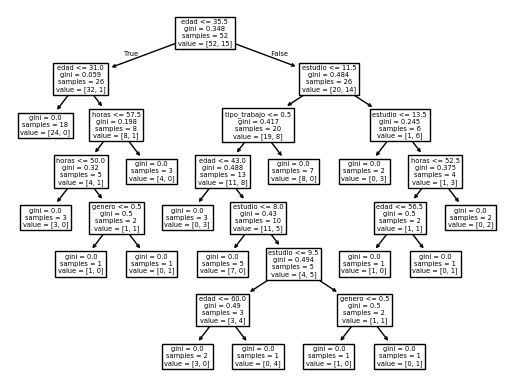

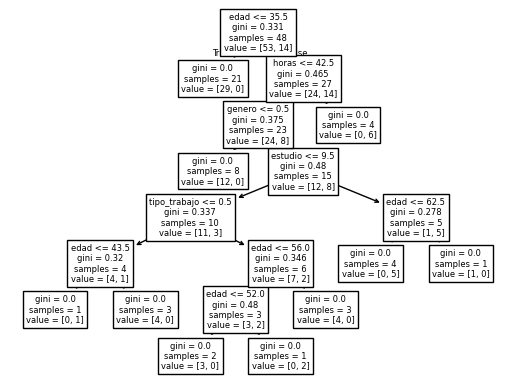

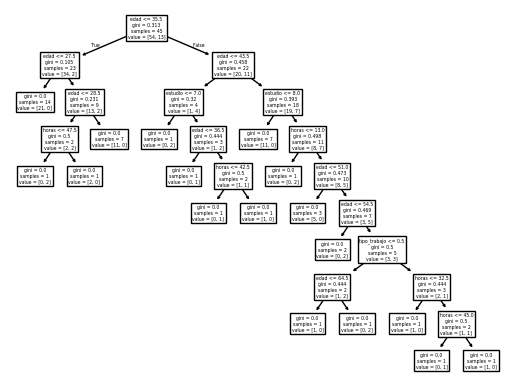

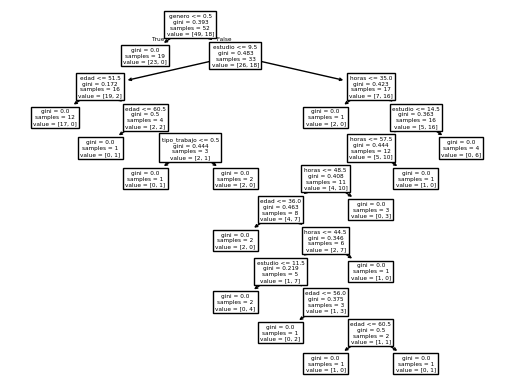

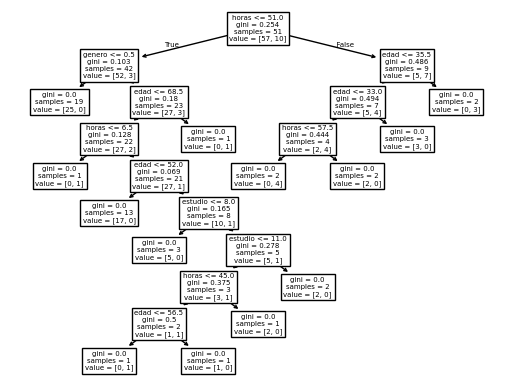

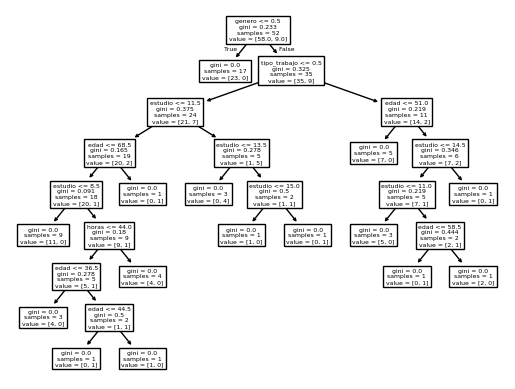

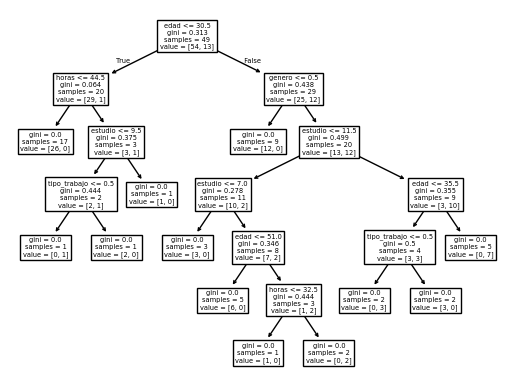

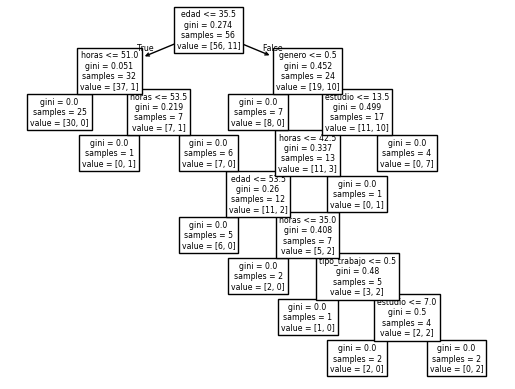

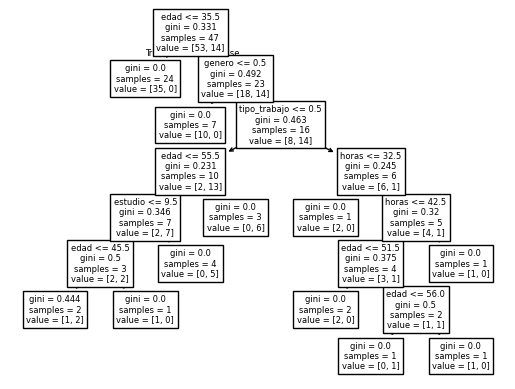

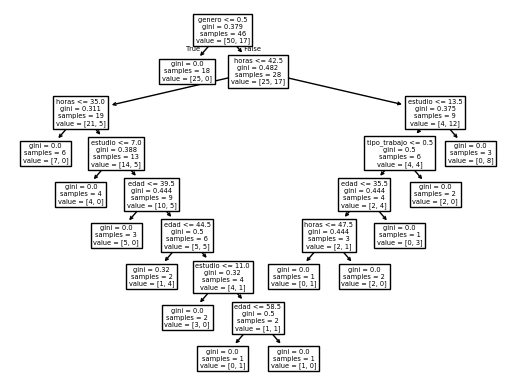

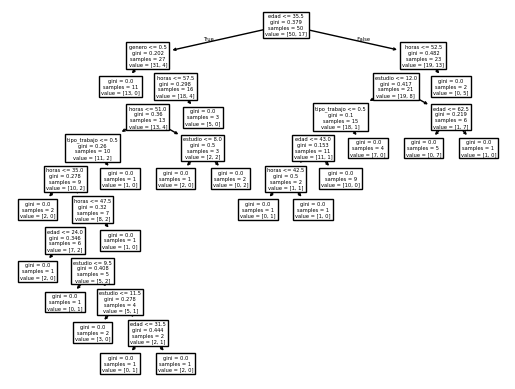

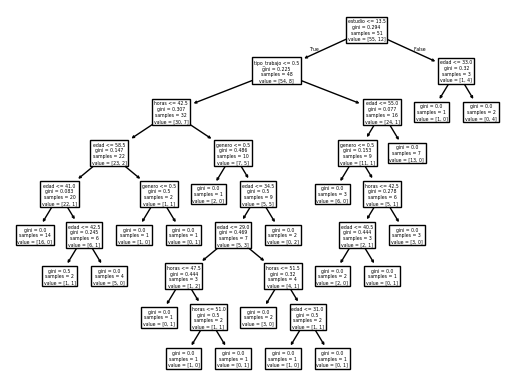

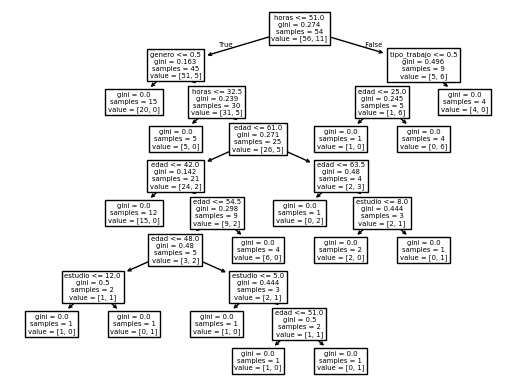

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

for arbol in bosque.estimators_:
  tree.plot_tree(arbol, feature_names=personas.columns[:-1])
  plt.show()